In [1]:
image_size=[224,224]

In [2]:
train_path='Dataset/train'
test_path='Dataset/test'

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [4]:
inceptionv3=InceptionV3(input_shape=image_size +[3],weights="imagenet",include_top=False)

In [5]:
for layer in inceptionv3.layers:
    layer.tranable=False

In [6]:
from glob import glob

In [7]:
folders=glob('Dataset/train/*')

In [8]:
len(folders)

4

In [9]:
from tensorflow.keras.layers import Flatten,Dense

In [10]:
X=Flatten()(inceptionv3.output)

In [11]:
prediction=Dense(len(folders),activation='softmax')(X)

In [12]:
from tensorflow.keras.models import Model

In [13]:
model=Model(inputs=inceptionv3.input,outputs=prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

Total params: 22,007,588
Trainable params: 21,973,156
Non-trainable params: 34,432
__________________________________________________________________________________________________


In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                shear_range=0.3,
                                zoom_range=0.3)

In [18]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [19]:
train_data=train_datagen.flow_from_directory('Dataset/train',target_size=[224,224],
                                            batch_size=32,
                                            class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [20]:
test_data=test_datagen.flow_from_directory('Dataset/test',
                                          target_size=[224,224],
                                          batch_size=32,
                                          class_mode='categorical')

Found 18 images belonging to 4 classes.


In [21]:
r=model.fit_generator(train_data,
                    validation_data=test_data,
                    epochs=15,
                    steps_per_epoch=len(train_data),
                    validation_steps=len(test_data))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
61/61 [==============================] - 1251s 21s/step - loss: 1.0536 - accuracy: 0.8078 - val_loss: 16030.2148 - val_accuracy: 0.3333
Epoch 2/15
61/61 [==============================] - 1239s 20s/step - loss: 0.8620 - accuracy: 0.8514 - val_loss: 501.7693 - val_accuracy: 0.2778
Epoch 3/15
61/61 [==============================] - 1238s 20s/step - loss: 0.4265 - accuracy: 0.8647 - val_loss: 14847.2275 - val_accuracy: 0.2778
Epoch 4/15
61/61 [==============================] - 1295s 21s/step - loss: 0.3453 - accuracy: 0.9185 - val_loss: 1.8023 - val_accuracy: 0.5556
Epoch 5/15
61/61 [==============================] - 1224s 20s/step - loss: 0.1830 - accuracy: 0.9380 - val_loss: 11.7199 - val_accuracy: 0.8333
Epoch 6/15
61/61 [==============================] - 1218s 20s/step - loss: 0.1151 - accuracy: 0.9631 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 7/15
61/61 [==============================] - 122

In [22]:
from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

In [23]:

import matplotlib.pyplot as plt


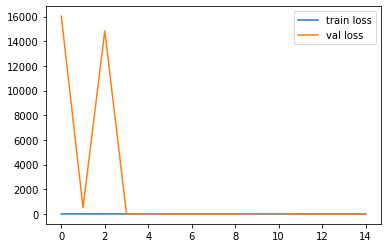

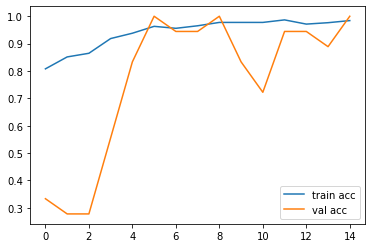

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model=load_model('model_resnet152V2.h5')

In [26]:
test_img=tf.keras.preprocessing.image.load_img('D:/cotton disease/Dataset/test/diseased cotton leaf/test4.jpg',target_size=(224,224))

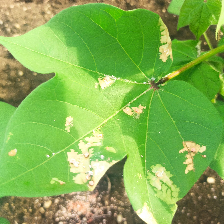

In [27]:
test_img

In [28]:
import numpy as np

In [29]:
from tensorflow.keras.preprocessing import image

In [30]:
x=image.img_to_array(test_img)

In [31]:
x



array([[[213., 180., 135.],
        [212., 179., 134.],
        [222., 190., 141.],
        ...,
        [154., 192.,  89.],
        [220., 243., 155.],
        [229., 250., 171.]],

       [[228., 195., 150.],
        [229., 196., 151.],
        [220., 187., 142.],
        ...,
        [189., 226., 123.],
        [227., 249., 167.],
        [230., 251., 172.]],

       [[217., 184., 139.],
        [221., 189., 140.],
        [215., 182., 137.],
        ...,
        [172., 210.,  99.],
        [230., 251., 172.],
        [229., 250., 171.]],

       ...,

       [[ 82., 151.,  62.],
        [ 86., 154.,  69.],
        [ 87., 155.,  70.],
        ...,
        [ 72.,  65.,  47.],
        [ 79.,  72.,  54.],
        [ 79.,  73.,  51.]],

       [[ 81., 151.,  65.],
        [ 79., 147.,  62.],
        [ 80., 148.,  63.],
        ...,
        [ 79.,  73.,  51.],
        [ 77.,  71.,  49.],
        [ 70.,  64.,  42.]],

       [[ 90., 154.,  70.],
        [103., 171.,  86.],
        [ 91., 1

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x=np.expand_dims(x,axis=0)

In [35]:
x.shape

(1, 224, 224, 3)

In [36]:
img_x=preprocess_input(x)

NameError: name 'preprocess_input' is not defined

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [ ]:
img_x=preprocess_input(x)

In [ ]:
y=model.predict(img_x)
print(y)

In [ ]:
a=np.argmax(model.predict(img_x),axis=1)

In [ ]:
print(a)

In [ ]:
if a==0:
    print()